# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Checking time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the data

### 1. Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = '_A2fxty8B4LieRV2Z_jS'

In [3]:
path = 'C:/Users/User/Movie Industry Analysis'

### I used the prepared data set Year_Avg_Bud_USA.csv which contains average annual budget movies of USA 

In [17]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Year_Avg_Bud_USA.csv'), index_col = False)

In [18]:
df.head(5)

,Row Labels,Average of budget
0,1980,15903896.10
1,1981,13716250.00
2,1982,15266701.03
3,1983,13408415.84
4,1984,15283408.00


In [19]:
df.shape

(41, 2)

In [20]:
df.columns

Index(['Row Labels', 'Average of budget'], dtype='object')

In [21]:
type(df)

pandas.core.frame.DataFrame

In [22]:
df.describe()

,Row Labels,Average of budget
count,41.000000,4.100000e+01
mean,2000.000000,3.390373e+07
std,11.979149,1.421433e+07
min,1980.000000,1.340842e+07
25%,1990.000000,1.944607e+07
50%,2000.000000,3.876071e+07
75%,2010.000000,4.558916e+07
max,2020.000000,5.558462e+07


In [23]:
# Set the "Row Labels" column as the index

df1 = df.set_index('Row Labels') # Set the Row Labels as the index of the dataframe.
df1.head()

,Average of budget
Row Labels,
1980,15903896.10
1981,13716250.00
1982,15266701.03
1983,13408415.84
1984,15283408.00


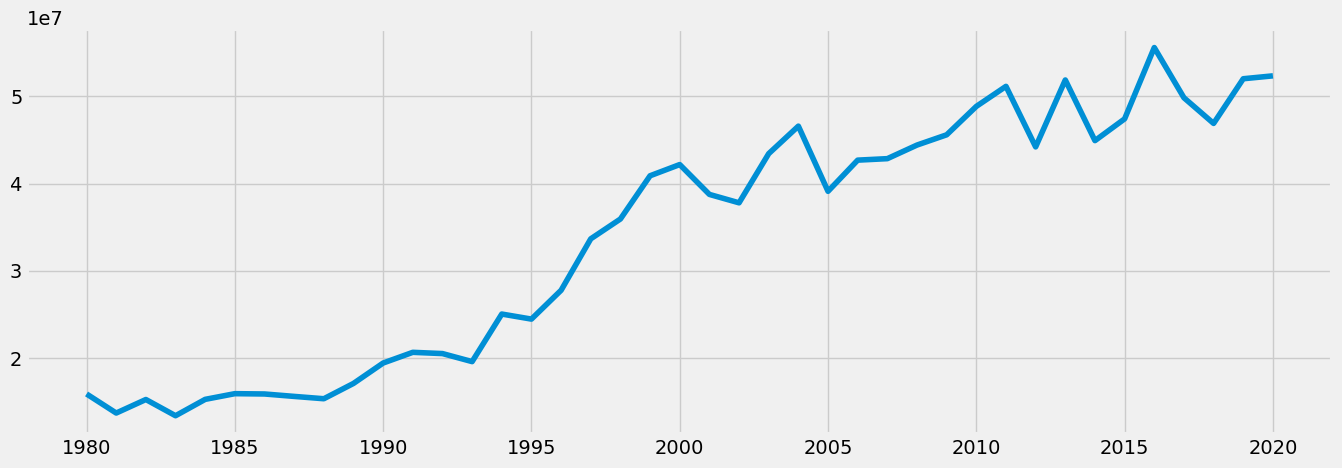

In [24]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 
plt.plot(df1)

### 2. Checking time-series data

In [25]:
# Check for missing values (you shouldn't have any)

df1.isnull().sum() 

Average of budget    0
dtype: int64

In [26]:
# Check for duplicates

dups = df1.duplicated()
dups.sum()

# No dups!

0

### 3. Time-series analysis: decomposition

In [28]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df1, model='additive', period=1)

In [29]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

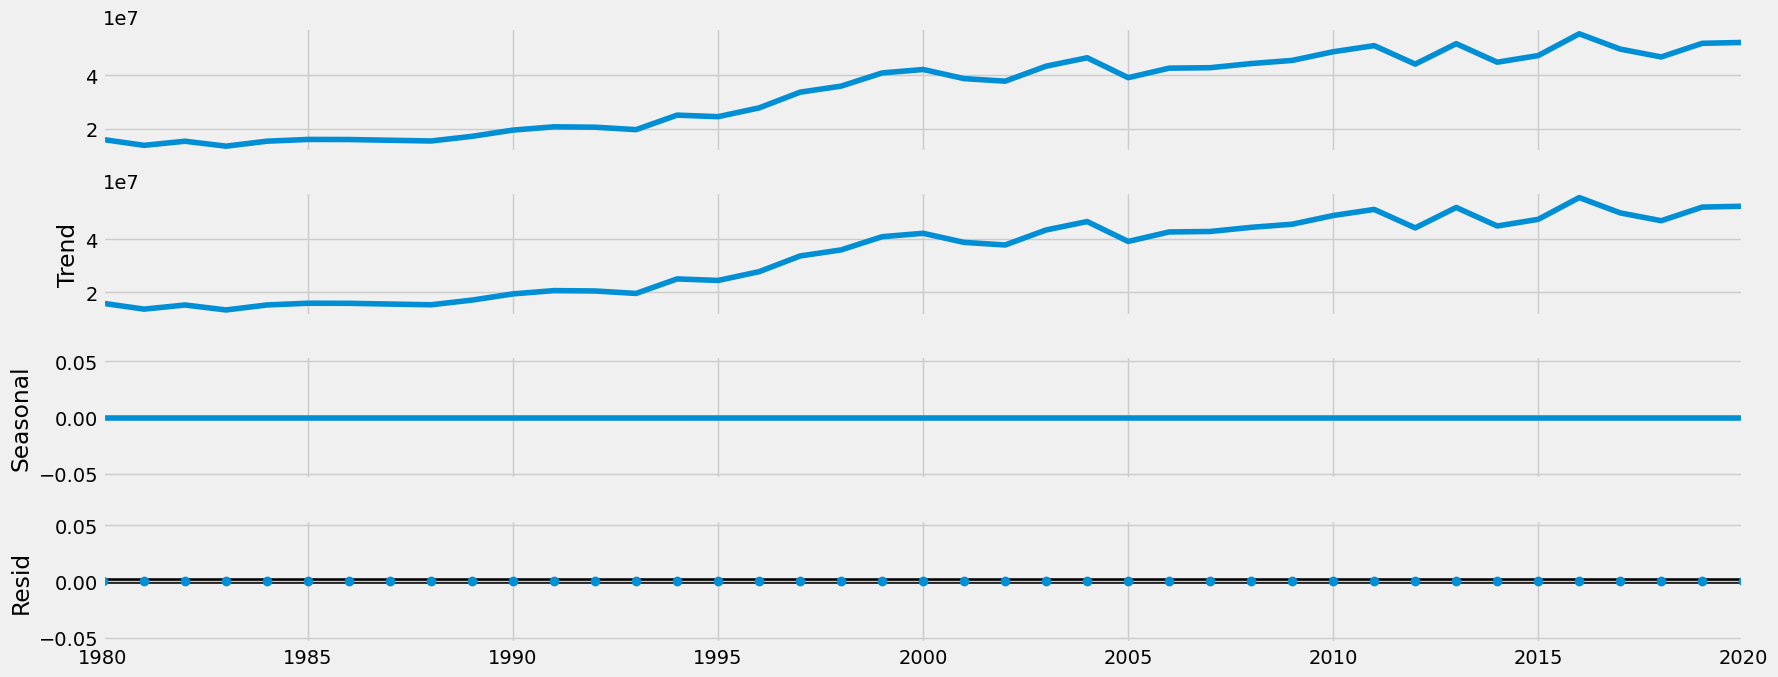

In [30]:
# Plot the separate components

decomposition.plot()
plt.show()

### We can see that the average budget of one movie grows between 1980 and 2020.                                                            However, seasonality and noise are missing.   

### 4. Testing for stationarity

In [32]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df1['Average of budget'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.668399
p-value                         0.854766
Number of Lags Used             2.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64


### For the significance level of 5 percent the Critical Value is -2.941262. This is much smaller than the test statistic, which is -0.668399, which means that we can’t reject the null hypothesis. This means that there is a unit root in the data, and the data is non-stationary.

### Checking for autocorrelations

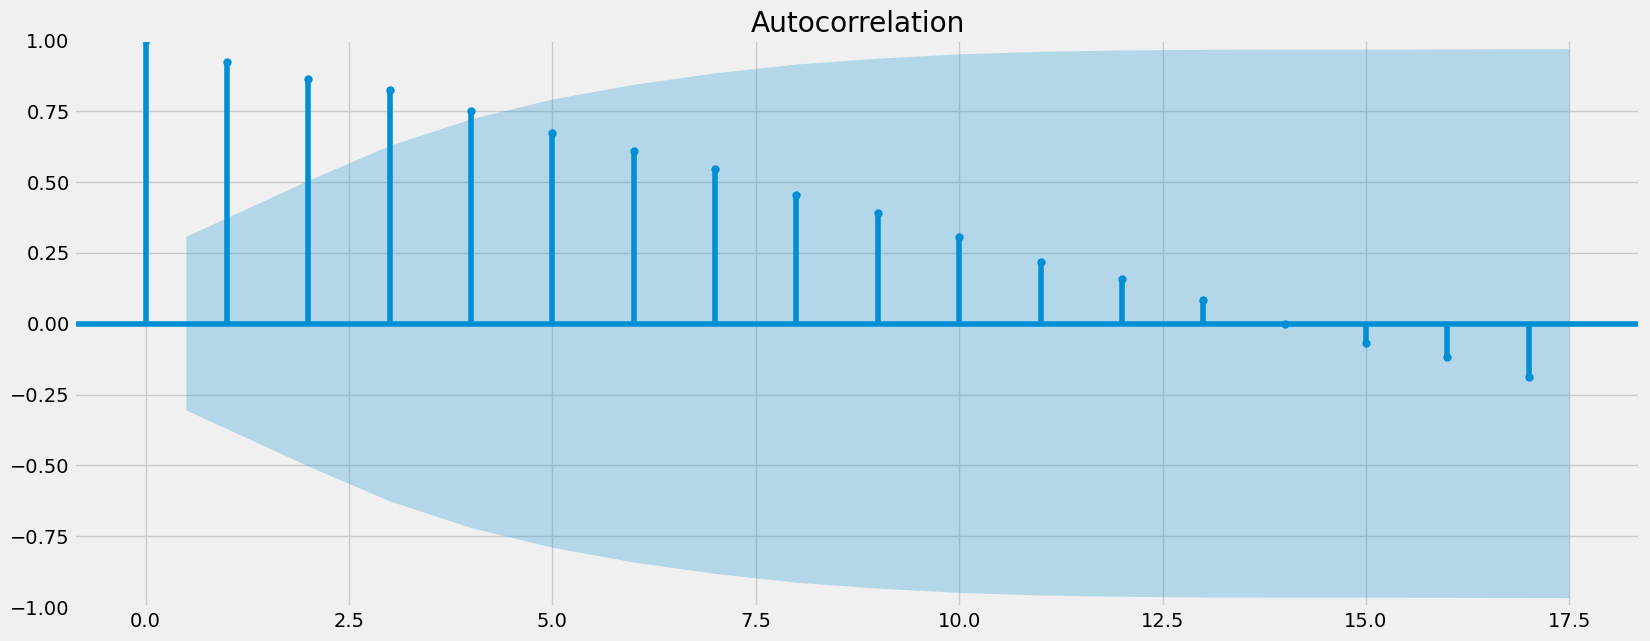

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  

plot_acf(df1)
plt.show()

### This plot of autocorrelation confirms that this data is non-stationary

### 5. Stationarizing the data

In [36]:
data_diff = df1 - df1.shift(1) 

In [38]:
data_diff.dropna(inplace = True) # Here, I removed the missing values that came about as a result of the differencing. 

In [39]:
data_diff.head()

,Average of budget
Row Labels,
1981,-2187646.10
1982,1550451.03
1983,-1858285.19
1984,1874992.16
1985,652171.71


In [40]:
data_diff.columns

Index(['Average of budget'], dtype='object')

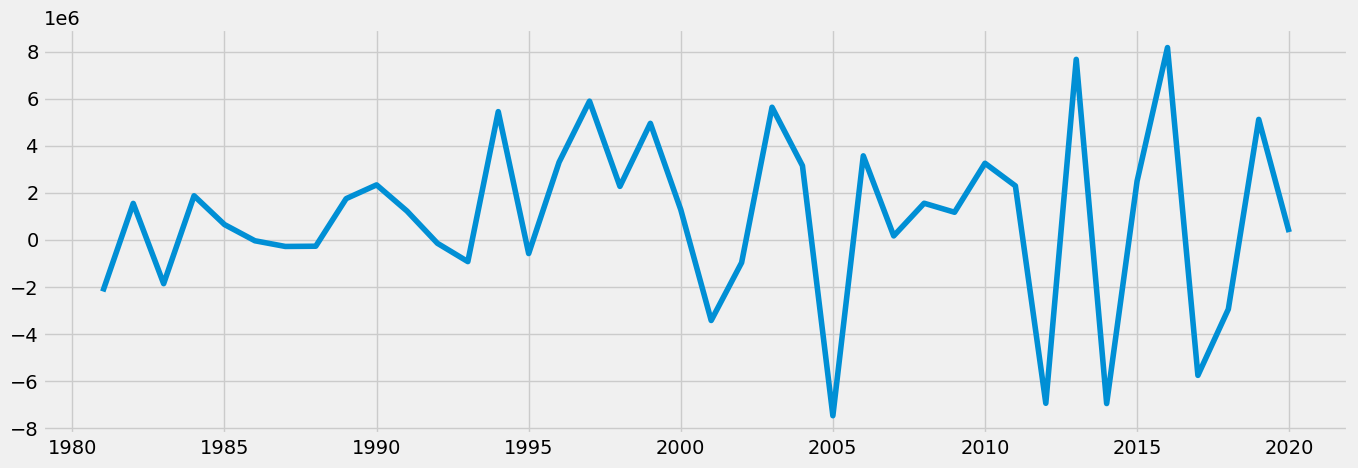

In [41]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [42]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -6.902469e+00
p-value                        1.271671e-09
Number of Lags Used            1.000000e+00
Number of Observations Used    3.800000e+01
Critical Value (1%)           -3.615509e+00
Critical Value (5%)           -2.941262e+00
Critical Value (10%)          -2.609200e+00
dtype: float64


### The test statistic is now smaller than the critical value at all one, five, and ten percent significance levels. You also have a satisfactory p-value (p<0.05). This means we can reject the null hypothesis and, as a result, consider the series as stationary.

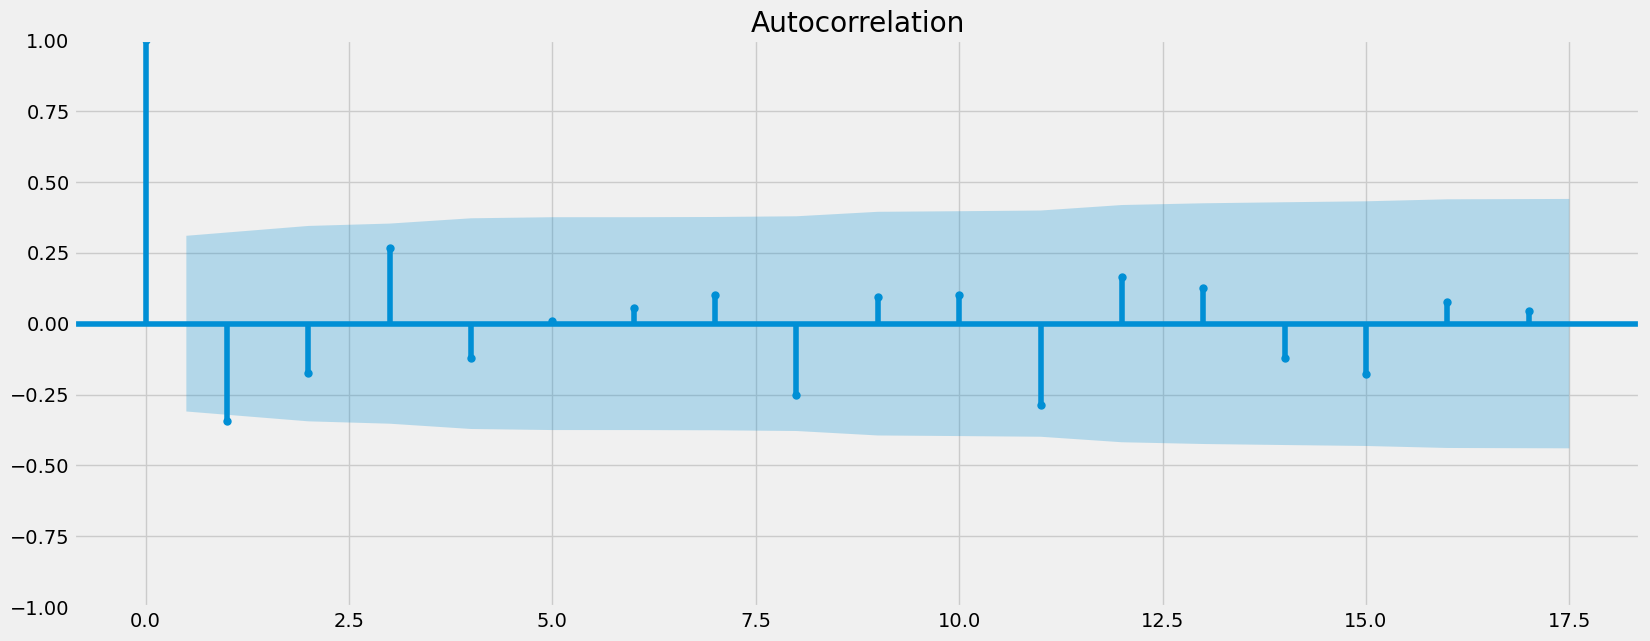

In [43]:
plot_acf(data_diff)
plt.show()

### The autocorrelation plot has improved (there are fewer autocorrelated terms), it is perfect.